# Data Visualization

## Importing Necessary Python Libraries

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [117]:
def readData(pathName):
    df = pd.read_csv(pathName)
    return df

In [118]:
def countplot(x1,x2,x3,x4,df):
    fig,ax = plt.subplots(1,4)
    sns.set_style("dark")
    sns.set(rc={'figure.figsize':(10,10)})
    sns.countplot(x=x1, data=df, palette=sns.color_palette("Paired", 7), saturation=10, ax = ax[0])
    sns.countplot(x=x2, data=df, palette=sns.color_palette("Paired", 7), saturation=10, ax = ax[1])
    sns.countplot(x=x3, data=df, palette=sns.color_palette("Paired", 7), saturation=10, ax = ax[2])
    sns.countplot(x=x4, data=df, palette=sns.color_palette("Paired", 7), saturation=10, ax = ax[3])

    fig.suptitle('Count plot',fontsize = 20);
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.4)
    fig.show()
    plt.show()
    print('Count plot - The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable')
    print('\nWe will display the target variable and check for data imbalance using this Count plot (if there are more number of churn customers than customers who wont churn or vice versa)')
    print('\nObservation1:\nThere is some data imbalance, as the number of churn consumers is significantly lower than the number of customers that will not churn')
    print('\nUsing count plot, lets see the frequency/count of different age group')
    print('\nAgegroup Range \n[0-15]    :   1\n[15-30]   :   2\n[30-45]   :   3\n[45-60]   :   4\n[60-80]   :   5\n[<0,>80]  :   2')    
    print('\nObservation2:\nThere are more people between the ages of 15 and 45')
    print('\nCharge amount is an ordinal attribute with lowest value being 0 and highest being 9')
    print('\nObservation3:\nThe charge amount of 0 has the highest count')

In [105]:
def Distribution_plot(df):
    fig, axarr = plt.subplots(2,2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')
    sns.set(style="white")
    sns.countplot(x='ageGroup', hue = 'Churn',data = df, ax=axarr[0][0], palette="Accent_r")
    sns.countplot(x='status', hue = 'Churn',data = df, ax=axarr[0][1], palette="Accent_r")
    sns.countplot(x='call_failure', hue = 'complains',data = df,ax=axarr[1][0], palette="Accent_r")
    sns.countplot(x='charge_amount', hue = 'ageGroup',data = df, ax=axarr[1][1], palette="Accent_r")
    fig.suptitle('Frequency Distribution of Different Categorical Variable',fontsize = 20);
    plt.show()
    print('Observation1\n We observe that there are many customers who are in the age group 30-60 and  are less likely to churn')
    print('Observation2\n We observe that the difference in count is huge between churn and non churn active customers(where active customers are more likely to not churn) as that of churn and non churn inactive customers')
    print('Observation3\n We observe that more number of customers have 0 call failures and hence 0 complaints')
    print('Observation4\n We observe that more number of customers who are in the age group of 30-60 have charge amount as o which refers to lowest pay ')

In [106]:
def pie(df):
    plt.pie(df['ageGroup'].value_counts(), labels=df['ageGroup'].value_counts().index.tolist(), autopct='%1.0f%%',shadow = True)
    plt.title('Pie Chart wrt AgeGroup',fontsize = 20);
    #plt.savefig('Distribution_pie_chart.png')
    plt.show()
    print('Observation\nAs we can see from the pie chart, most of the customers are of the age group 30-45')

In [107]:
def boxplot(df):
    
    sns.set(style="whitegrid",font_scale=1)
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df)
    plt.xticks(rotation=80)
    plt.title("Box plot For Outlier Analysis",fontsize = 20)
    plt.show()
    print('outlier analysis using box-plot')
    print('Observation\nAs we can see there are outliers in our dataset, especially in seconds_of_use column we have more outliers')

In [108]:
def pairplot(df):
    df["Churn"] = np.random.choice([1., 0.], size=len(df))
    sns.pairplot(df,vars=df.columns[:7], corner=True, hue = 'Churn' )
    plt.show()

In [109]:
    %matplotlib inline
    df = readData('../data/churn_final.csv')
    corr = df.corr()
    cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

    def magnify():
        return [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '12pt')])
    ]

    corr.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Hover to magify")\
        .set_precision(2)\
        .set_table_styles(magnify())

,call_failure,complains,subs_len,charge_amount,seconds_of_use,freq_of_use,freq_of_sms,distinct_call_nums,tariff_plan,status,age,ageGroup,customer_value,FN,FP,Churn
call_failure,1.00,0.15,0.17,0.58,0.50,0.57,-0.02,0.50,0.19,-0.12,0.18,0.17,0.12,0.12,0.11,-0.01
complains,0.15,1.00,-0.02,-0.03,-0.10,-0.09,-0.11,-0.06,0.00,0.16,-0.03,-0.03,-0.13,-0.13,-0.13,0.53
subs_len,0.17,-0.02,1.00,0.08,0.12,0.11,0.08,0.09,-0.16,0.07,0.05,0.04,0.11,0.11,0.11,-0.03
charge_amount,0.58,-0.03,0.08,1.00,0.44,0.37,0.09,0.41,0.32,-0.27,0.10,0.09,0.17,0.17,0.16,-0.20
seconds_of_use,0.50,-0.10,0.12,0.44,1.00,0.94,0.10,0.67,0.13,-0.31,0.02,0.02,0.41,0.41,0.40,-0.30
freq_of_use,0.57,-0.09,0.11,0.37,0.94,1.00,0.10,0.73,0.21,-0.30,0.02,0.02,0.40,0.40,0.38,-0.29
freq_of_sms,-0.02,-0.11,0.08,0.09,0.10,0.10,1.00,0.08,0.20,-0.20,0.01,0.01,0.92,0.92,0.93,-0.22
distinct_call_nums,0.50,-0.06,0.09,0.41,0.67,0.73,0.08,1.00,0.17,-0.27,0.03,0.03,0.28,0.28,0.26,-0.28
tariff_plan,0.19,0.00,-0.16,0.32,0.13,0.21,0.20,0.17,1.00,-0.11,0.02,0.01,0.25,0.25,0.25,-0.11
status,-0.12,0.16,0.07,-0.27,-0.31,-0.30,-0.20,-0.27,-0.11,1.00,0.04,0.04,-0.27,-0.27,-0.26,0.32


In [110]:
def correlation(df):
    corr = df.corr()
    cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
    def magnify():
        return [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '12pt')])
    ]
    corr.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Hover to magify")\
        .set_precision(2)\
        .set_table_styles(magnify())

In [111]:
#heatmap for correlation coefficient

def plotHeatMap(df):
    df_corr = df.corr()

    # correlation matrix
    sns.set(font_scale=0.8)
    plt.figure(figsize=(16,12))
    sns.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.diverging_palette(148, 302, s=60, as_cmap=True))

    #plt.yticks(rotation=0)
    plt.show()
    
    #feature importance using corr
    
    df.drop('Churn', axis=1).corrwith(df.Churn).plot(kind='barh', figsize=(8, 6), color='skyblue', title="Churn vs all features")

In [119]:
def main():
    # Load dataset
    df = readData('../data/churn_final.csv')
    countplot('Churn','ageGroup','charge_amount','complains',df)
    
    print('\n******************************************************************************************************')
    Distribution_plot(df)
    print('\n******************************************************************************************************')
    pie(df)
    print('\n******************************************************************************************************')
    boxplot(df)
    print('\n******************************************************************************************************')
    pairplot(df)
    print('\n******************************************************************************************************')
    correlation(df)
    print('\n******************************************************************************************************')
    plotHeatMap(df)
    
    matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')

    sns.heatmap(matrix_df, annot=True)
   

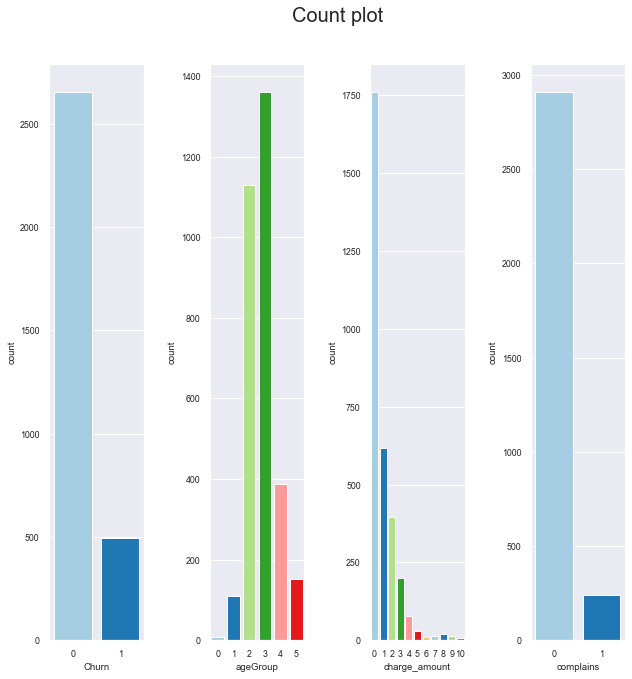

Count plot - The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable

We will display the target variable and check for data imbalance using this Count plot (if there are more number of churn customers than customers who wont churn or vice versa)

Observation1:
There is some data imbalance, as the number of churn consumers is significantly lower than the number of customers that will not churn

Using count plot, lets see the frequency/count of different age group

Agegroup Range 
[0-15]    :   1
[15-30]   :   2
[30-45]   :   3
[45-60]   :   4
[60-80]   :   5
[<0,>80]  :   2

Observation2:
There are more people between the ages of 15 and 45

Charge amount is an ordinal attribute with lowest value being 0 and highest being 9

Observation3:
The charge amount of 0 has the highest count

******************************************************************************************************


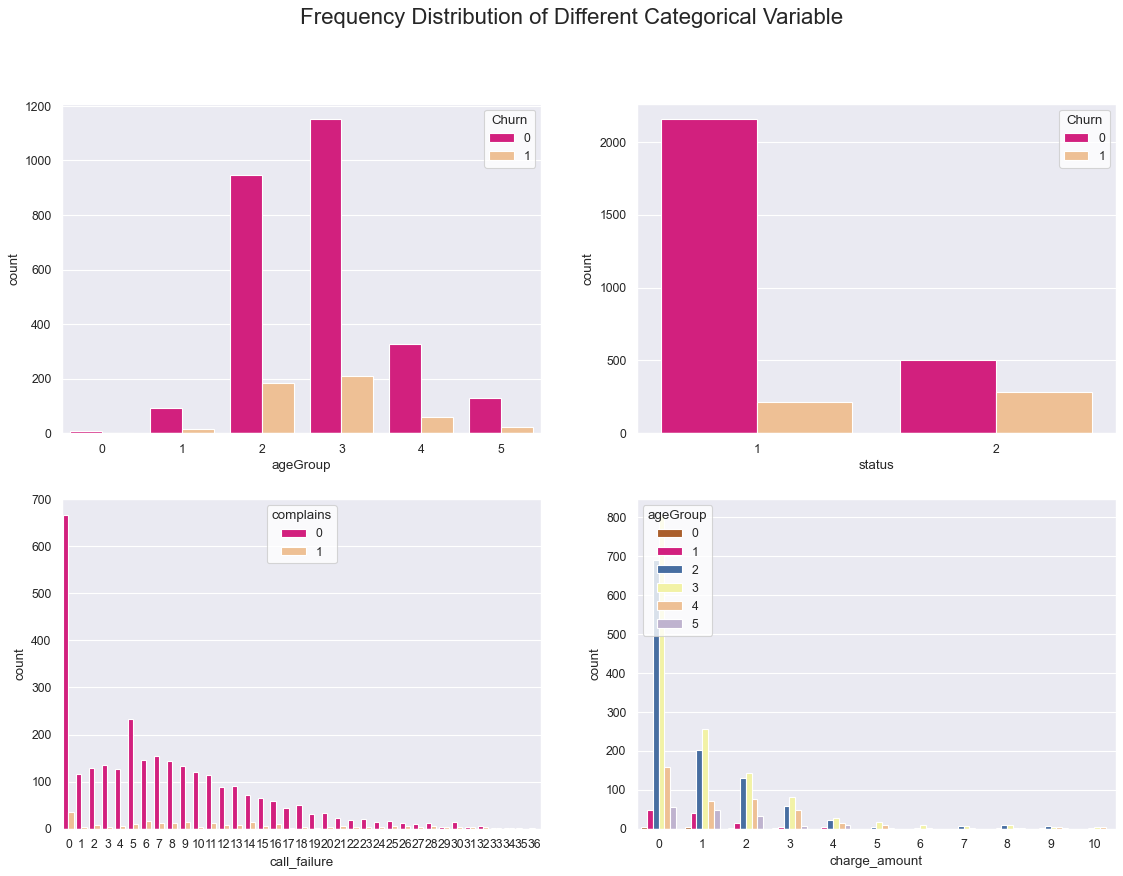

Observation1
 We observe that there are many customers who are in the age group 30-60 and  are less likely to churn
Observation2
 We observe that the difference in count is huge between churn and non churn active customers(where active customers are more likely to not churn) as that of churn and non churn inactive customers
Observation3
 We observe that more number of customers have 0 call failures and hence 0 complaints
Observation4
 We observe that more number of customers who are in the age group of 30-60 have charge amount as o which refers to lowest pay 

******************************************************************************************************


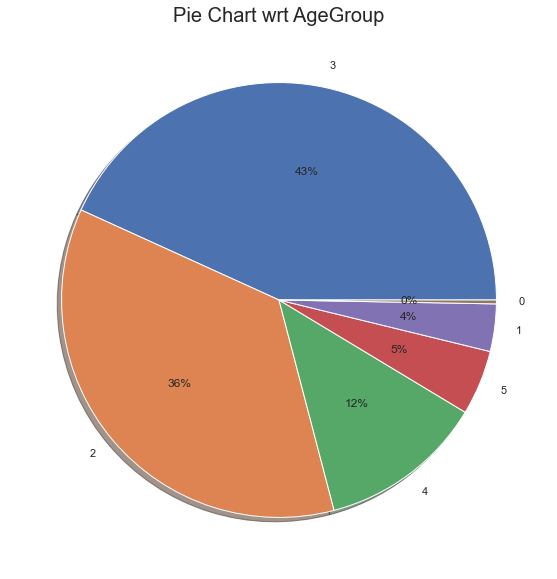

Observation
As we can see from the pie chart, most of the customers are of the age group 30-45

******************************************************************************************************


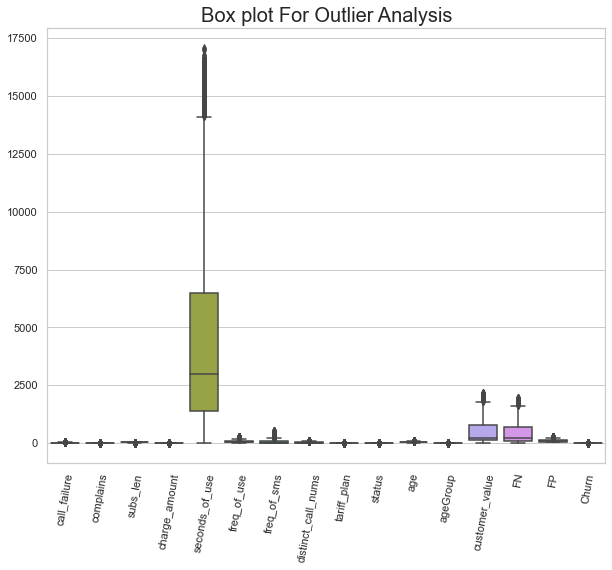

outlier analysis using box-plot
Observation
As we can see there are outliers in our dataset, especially in seconds_of_use column we have more outliers

******************************************************************************************************


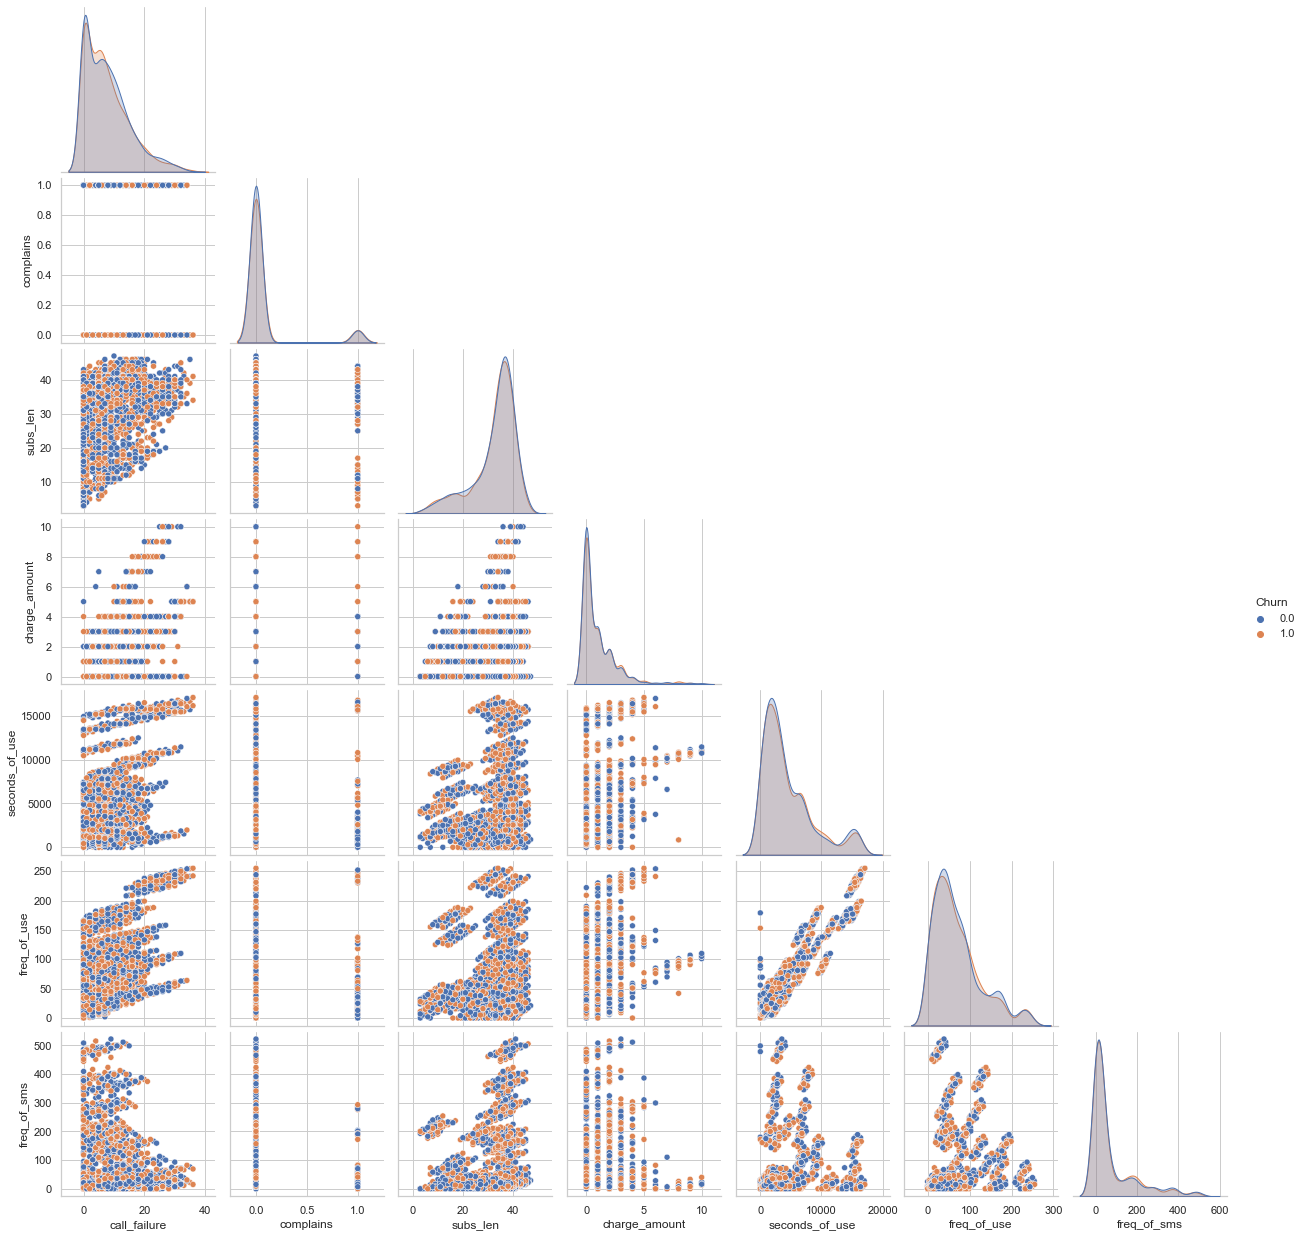


******************************************************************************************************

******************************************************************************************************


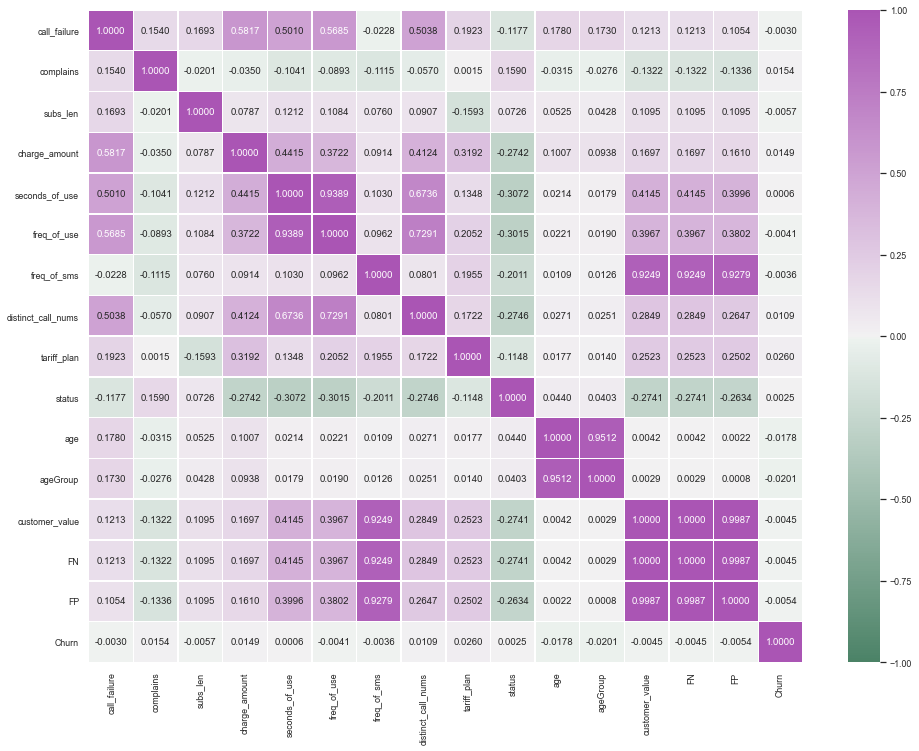

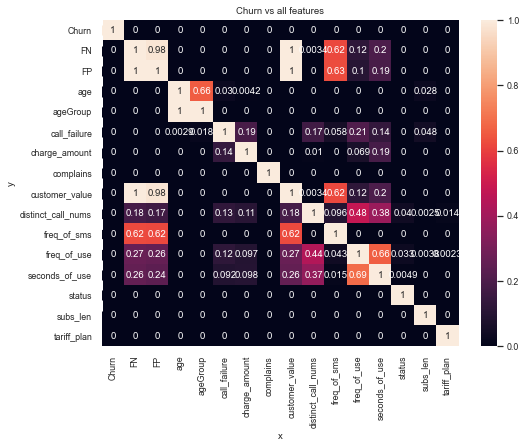

In [120]:
main()